In [1]:
!pip install scikit-learn

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files, drive
import os
import cv2
import random
import pickle
from IPython.display import clear_output
from PIL import Image
import sklearn

In [3]:
def load_dataset():
    if os.path.exists('/content/brain_tumor_mri'):
        return

    uploaded = files.upload()

    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes.'.format(name=fn, length=len(uploaded[fn])))

    !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download -d jarvisgroot/brain-tumor-classification-mri-images
    !unzip brain-tumor-classification-mri-images.zip
    clear_output()

def load_dataset_drive():
    drive.mount('/content/drive')
    !mkdir -p ~/.kaggle/ && cp drive/MyDrive/Datasets/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download -d jarvisgroot/brain-tumor-classification-mri-images
    !unzip brain-tumor-classification-mri-images.zip
    clear_output()

def setup_dataset():
    data_path = '/content/brain_tumor_mri/new_dataset/bt_images'

    training_data_path = os.path.join(data_path, '/content/brain_tumor_mri/new_dataset/training_data.pickle')
    labels_path = os.path.join(data_path, '/content/brain_tumor_mri/new_dataset/labels.pickle')
    test_data_path = os.path.join(data_path, '/content/test_images-20210704T210303Z-001/test_images')

    with open(training_data_path, 'rb') as training_data_file:
        training_data = pickle.load(training_data_file)

    random.shuffle(training_data)

    X = []
    y = []

    for features, labels in training_data:
        X.append(features)
        y.append(labels)

    X = np.array(X).reshape(-1, 512, 512, 3)
    y = np.array(y)
    y = y - 1

    return X, y

def setup_dataset_images():
    data_path = '/content/brain_tumor_mri/new_dataset/bt_images'

    training_data_path = os.path.join(data_path, '/content/brain_tumor_mri/new_dataset/training_data.pickle')
    labels_path = os.path.join(data_path, '/content/brain_tumor_mri/new_dataset/labels.pickle')
    test_data_path = os.path.join(data_path, '/content/test_images-20210704T210303Z-001/test_images')

    with open(labels_path, 'rb') as labels_file:
        labels = training_data = pickle.load(labels_file)

    labels = np.array(labels)
    labels = labels - 1

    labels = np.array(labels)
    labels = labels - 1

    image_data = []

    for i in range(3064):
        image_file = f"{i + 1}.jpg"
        image_path = os.path.join(data_path, image_file)
        img = Image.open(image_path)

        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
        image_array = tf.keras.preprocessing.image.img_to_array(img)
        # image_array = np.expand_dims(image_array, axis=0)
        image_array = tf.keras.applications.inception_v3.preprocess_input(image_array)

        image_data.append(image_array)
        del image_array

    image_data = np.array(image_data)
    sklearn.utils.shuffle(image_data, labels)

    return image_data, labels

In [4]:
load_dataset()

training_data, labels = setup_dataset_images()

In [5]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64, (3,3), input_shape=X.shape[1:]),
#     tf.keras.layers.Activation("softmax"),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(128, (3,3)),
#     tf.keras.layers.Activation("relu"),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128),
#     tf.keras.layers.Activation("relu"),

#     tf.keras.layers.Dense(3),
#     tf.keras.layers.Activation('softmax')
# ])

# model.summary()

In [6]:
# pretrained_model = tf.keras.applications.vgg16.VGG16(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=training_data.shape[1:],
#     pooling=None,
#     classes=3,
#     classifier_activation='softmax'
# )

# pretrained_model = tf.keras.applications.VGG19(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=training_data.shape[1:],
#     pooling=None,
#     classes=3,
#     classifier_activation="softmax",
# )


# pretrained_model = tf.keras.applications.resnet_v2.ResNet50V2(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=training_data.shape[1:],
#     pooling=None,
#     classes=3,
#     classifier_activation='softmax'
# )


# pretrained_model = tf.keras.applications.ResNet101V2(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=training_data.shape[1:],
#     pooling=None,
#     classes=3,
#     classifier_activation="softmax",
# )

# pretrained_model = tf.keras.applications.ResNet152V2(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=training_data.shape[1:],
#     pooling=None,
#     classes=3,
#     classifier_activation="softmax",
# )


# pretrained_model = tf.keras.applications.densenet.DenseNet121(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=training_data.shape[1:],
#     pooling=None,
#     classes=3,
#     classifier_activation='softmax'
# )


pretrained_model = tf.keras.applications.InceptionV3(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=training_data.shape[1:],
    pooling=None,
    classes=3,
    classifier_activation="softmax",
)

pretrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalizati

In [7]:
model_features_train = pretrained_model.predict(training_data)
del training_data
del pretrained_model

# train_target = tf.keras.utils.to_categorical(labels)

# del labels

96/96 [==============================] - 19s 85ms/step


In [8]:
# train_target = np.where(train_target == 1)[1]
# model_features_train = model_features_train[1].reshape(3, 1)
# model_features_train.shape

In [9]:
model = tf.keras.models.Sequential([
    # tf.keras.layers.Flatten(input_shape=vgg_features_train.shape[1:]),
    # tf.keras.layers.Dense(100, activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dense(3, activation='softmax')

    # tf.keras.layers.Conv2D(64, (3,3), input_shape=model_features_train.shape[1:]),
    # tf.keras.layers.Activation("softmax"),
    # # tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # tf.keras.layers.BatchNormalization(),

    # tf.keras.layers.Conv2D(128, (3,3)),
    # tf.keras.layers.Activation("relu"),
    # # tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(input_shape=model_features_train.shape[1:]),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(3),
    tf.keras.layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3)                 0         
                                                                 
 dense (Dense)               (None, 128)               512       
                                                                 
 activation_94 (Activation)  (None, 128)               0         
                                                                 
 batch_normalization_94 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
 activation_95 (Activation)  (None, 3)                 0         
                                                        

In [10]:
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(model_features_train, labels, batch_size=16, epochs=50, validation_split=0.1)

Epoch 1/50
173/173 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.4066 - val_loss: nan - val_accuracy: 0.9902
Epoch 2/50
173/173 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.4070 - val_loss: nan - val_accuracy: 0.9902
Epoch 3/50
173/173 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.4070 - val_loss: nan - val_accuracy: 0.9902
Epoch 4/50
173/173 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.4070 - val_loss: nan - val_accuracy: 0.9902
Epoch 5/50
173/173 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.4070 - val_loss: nan - val_accuracy: 0.9902
Epoch 6/50
173/173 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.4070 - val_loss: nan - val_accuracy: 0.9902
Epoch 7/50
173/173 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.4070 - val_loss: nan - val_accuracy: 0.9902
Epoch 8/50
173/173 [===========================

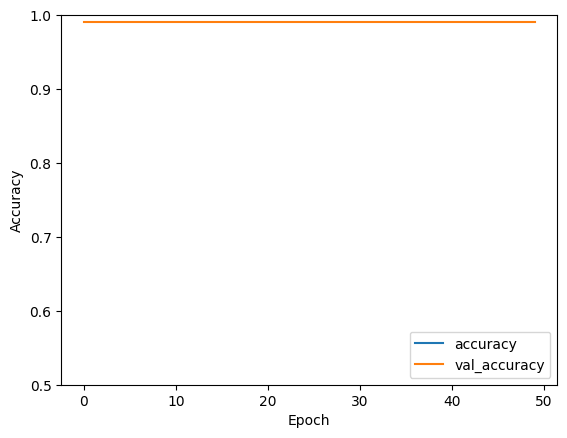

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [12]:
# model.save('test_model.model')

# !zip -r test_model.zip test_model.model/
# !mv test_model.zip drive/MyDrive/Datasets/

In [13]:
# file_size = os.path.getsize('drive/MyDrive/Datasets/test_model.zip')
# print("File Size is :", file_size, "bytes")

In [14]:
data_path = '/content/brain_tumor_mri/new_dataset/bt_images'

training_data_path = os.path.join(data_path, '/content/brain_tumor_mri/new_dataset/training_data.pickle')
labels_path = os.path.join(data_path, '/content/brain_tumor_mri/new_dataset/labels.pickle')
test_data_path = os.path.join(data_path, '/content/test_images-20210704T210303Z-001/test_images')

In [15]:
test_data = []

for img in os.listdir(test_data_path):
    img_array = cv2.imread(os.path.join(test_data_path, img))
    test_data.append([img_array])

In [16]:
test_data = np.array(test_data).reshape(-1, 512, 512, 3)

In [17]:
# predictions = model.predict([test_data])
# print(np.argmax(predictions[0]))

In [18]:
# plt.imshow(test_data[0])
# plt.show()